In [1]:
import pandas as pd
import numpy as np

from nilearn.plotting import plot_glass_brain, plot_epi, plot_matrix
from nilearn import plotting
import nilearn as nil
from nilearn.masking import apply_mask, unmask

import matplotlib.pyplot as plt
%matplotlib inline

## Fixed Effects

In [7]:
results_dir = 'results_offset'
hem = 'left'
phase = 'early'

respat = results_dir + '/' + hem + '_insula_' + phase

In [9]:
fixef = pd.read_csv(respat+'_POP.txt',sep='\t')
fixef.head()

Intercept      cond
0    34.4268 -0.115794
1    34.3882 -0.092393
2    34.4078 -0.060312
3    34.4183 -0.074622
4    34.4740 -0.010283

## Random Effects 

### Condition

In [10]:
ROI_cond = pd.read_csv(respat + "_ROI_cond.txt",sep='\t')
print('Size:',ROI_cond.shape)
ROI_cond.head()

Size: (40000, 11)


left_roi01  left_roi02  left_roi03  left_roi04  left_roi05  left_roi06  \
0    0.255662    0.191767    0.451852   -0.252938   -0.058026   -0.038223   
1    0.334150    0.271428    0.429975   -0.226943   -0.050158   -0.052984   
2    0.270464    0.245778    0.374135   -0.276814   -0.112880   -0.071388   
3    0.348711    0.209770    0.403036   -0.310228   -0.058677   -0.008970   
4    0.253003    0.193491    0.374979   -0.325284   -0.076484   -0.066341   

   left_roi07  left_roi08  left_roi09  left_roi10  left_roi11  
0   -0.068966    0.041551   -0.298397    0.000562    0.162083  
1   -0.058656    0.058216   -0.249807    0.034554    0.201166  
2   -0.063856    0.000688   -0.291154    0.007493    0.188802  
3   -0.038247    0.022557   -0.301481    0.058514    0.178104  
4   -0.039876   -0.021681   -0.343658    0.019874    0.120341

In [11]:
VOX_cond = pd.read_csv(respat + "_VOX_cond.txt",sep='\t')
print('Size:',VOX_cond.shape)
VOX_cond.head()

Size: (40000, 941)


left_roi01_000  left_roi01_001  left_roi01_002  left_roi01_003  \
0        0.067006        0.050488        0.152111        0.119774   
1        0.057094        0.050513        0.354973        0.084814   
2        0.048300        0.216629        0.169594        0.038044   
3        0.142256        0.019724        0.175489        0.066853   
4       -0.017666        0.089064        0.205273        0.080091   

   left_roi01_004  left_roi01_005  left_roi01_006  left_roi01_007  \
0        0.195942       -0.153330        0.050478       -0.023774   
1        0.228878       -0.159068       -0.238094       -0.076774   
2        0.222493       -0.090282       -0.102762       -0.041506   
3        0.170452       -0.055015       -0.087498       -0.037280   
4        0.200389       -0.252085       -0.121232       -0.077461   

   left_roi01_008  left_roi01_009  ...  left_roi11_077  left_roi11_078  \
0        0.009211        0.025271  ...       -0.008955       -0.046828   
1       -0.006618       -0.172222  ...       -0.156065       -0.000616   
2       -0.116791       -0.040650  ...       -0.008252        0.010606   
3       -0.019406       -0.244855  ...       -0.163136       -0.057729   
4       -0.035178        0.016126  ...       -0.021019        0.032839   

   left_roi11_079  left_roi11_080  left_roi11_081  left_roi11_082  \
0        0.100558       -0.084262        0.181975        0.124158   
1       -0.128032       -0.049721        0.151727        0.185718   
2       -0.011589        0.081184        0.158937        0.115632   
3       -0.050475       -0.119378        0.160330        0.154047   
4       -0.015952       -0.045299        0.319389        0.115221   

   left_roi11_083  left_roi11_084  left_roi11_085  left_roi11_086  
0        0.054208       -0.137603       -0.048085       -0.122339  
1       -0.005198       -0.039511       -0.064037       -0.111284  
2        0.057257       -0.016905       -0.151607       -0.141043  
3        0.037565       -0.063443       -0.061239       -0.130539  
4        0.055148       -0.042253       -0.002002       -0.156995  

[5 rows x 941 columns]

In [12]:
def combinePos(ROI,VOX):
    posteriors = pd.DataFrame()
    for roi in ROI.columns:
        roi_pos = ROI[roi].values
        vox_pos = VOX[[col for col in VOX.columns if roi in col]].values
        
        tmp_df = pd.DataFrame(roi_pos.reshape(-1,1) + vox_pos,
                              columns=[col for col in VOX.columns if roi in col])
        posteriors = pd.concat([posteriors,tmp_df],axis=1)
    return posteriors

def add_mean(posteriors,fixef,effect):
    return posteriors.add(fixef[effect],axis=0)

In [13]:
posteriors = combinePos(ROI_cond,VOX_cond)
posteriors = add_mean(posteriors,fixef,'cond')

In [15]:
posteriors.head()

left_roi01_000  left_roi01_001  left_roi01_002  left_roi01_003  \
0        0.206874        0.190356        0.291979        0.259642   
1        0.298851        0.292270        0.596730        0.326571   
2        0.258453        0.426781        0.379746        0.248196   
3        0.416345        0.293812        0.449578        0.340942   
4        0.225053        0.331784        0.447993        0.322811   

   left_roi01_004  left_roi01_005  left_roi01_006  left_roi01_007  \
0        0.335810       -0.013462        0.190346        0.116094   
1        0.470635        0.082689        0.003663        0.164983   
2        0.432645        0.119870        0.107390        0.168646   
3        0.444541        0.219073        0.186591        0.236809   
4        0.443109       -0.009365        0.121488        0.165259   

   left_roi01_008  left_roi01_009  ...  left_roi11_077  left_roi11_078  \
0        0.149079        0.165139  ...        0.037334       -0.000539   
1        0.235139        0.069535  ...       -0.047292        0.108157   
2        0.093361        0.169503  ...        0.120238        0.139096   
3        0.254683        0.029234  ...       -0.059654        0.045753   
4        0.207542        0.258845  ...        0.089038        0.142897   

   left_roi11_079  left_roi11_080  left_roi11_081  left_roi11_082  \
0        0.146847       -0.037973        0.228264        0.170447   
1       -0.019259        0.059052        0.260500        0.294491   
2        0.116902        0.209674        0.287427        0.244122   
3        0.053006       -0.015896        0.263812        0.257529   
4        0.094106        0.064758        0.429446        0.225278   

   left_roi11_083  left_roi11_084  left_roi11_085  left_roi11_086  
0        0.100497       -0.091314       -0.001796       -0.076050  
1        0.103575        0.069262        0.044735       -0.002511  
2        0.185747        0.111586       -0.023117       -0.012553  
3        0.141047        0.040038        0.042242       -0.027057  
4        0.165206        0.067805        0.108056       -0.046937  

[5 rows x 941 columns]

## P+ map creation

ROIs indexes:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]


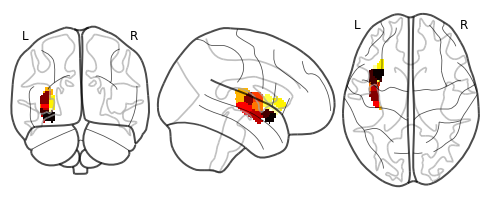

In [14]:
# Load the ROI mask
if hem == 'left':
    maskpat = 'left_insula_11ROIs.nii.gz'
elif hem == 'right':
    maskpat = 'right_insula_10ROIs.nii.gz'
    
mask = nil.image.load_img(maskpat)
roi_indx = np.unique(mask.get_data())[1:]
print('ROIs indexes: ',roi_indx)
plot_glass_brain(mask)

In [16]:
def getSubMask(indx,mask):
    '''
    Takes in the mask and ROI index, and outputs a binary (0s and 1s) 
    mask with only that ROI.
    '''
    mask_idx = np.where(mask.get_data() == indx)
    sub_mask = np.zeros_like(mask.get_data())
    sub_mask[mask_idx] = 1
    sub_mask_img = nil.image.new_img_like(mask,sub_mask)
    return sub_mask_img

In [17]:
# P+ of every voxel is computed and rendered on a brain template for visualization
probMask = nil.image.new_img_like(mask,np.zeros_like(mask.get_data()))
for ii, n in enumerate(roi_indx):
    n_vox = (mask.get_data() == n).sum()
    roi_mask = getSubMask(n,mask)
    print('ROI index:',n)
    print('Num of voxels in data table:',n_vox)
    print('Number of vox in the roi mask:',(roi_mask.get_data() == 1).sum())
    p_plus = []
    for jj, m in enumerate(range(n_vox)):
        vox = posteriors[hem+'_roi{:02d}_{:03d}'.format(int(n),m)]
        p_plus.append(np.mean(vox > 0))
        
    rendered = unmask(p_plus,roi_mask)
    probMask = nil.image.math_img("img1 + img2",img1=probMask,img2=rendered)

ROI index: 1.0
Num of voxels in data table: 74
Number of vox in the roi mask: 74
ROI index: 2.0
Num of voxels in data table: 85
Number of vox in the roi mask: 85
ROI index: 3.0
Num of voxels in data table: 77
Number of vox in the roi mask: 77
ROI index: 4.0
Num of voxels in data table: 73
Number of vox in the roi mask: 73
ROI index: 5.0
Num of voxels in data table: 113
Number of vox in the roi mask: 113
ROI index: 6.0
Num of voxels in data table: 67
Number of vox in the roi mask: 67
ROI index: 7.0
Num of voxels in data table: 106
Number of vox in the roi mask: 106
ROI index: 8.0
Num of voxels in data table: 90
Number of vox in the roi mask: 90
ROI index: 9.0
Num of voxels in data table: 85
Number of vox in the roi mask: 85
ROI index: 10.0
Num of voxels in data table: 84
Number of vox in the roi mask: 84
ROI index: 11.0
Num of voxels in data table: 87
Number of vox in the roi mask: 87



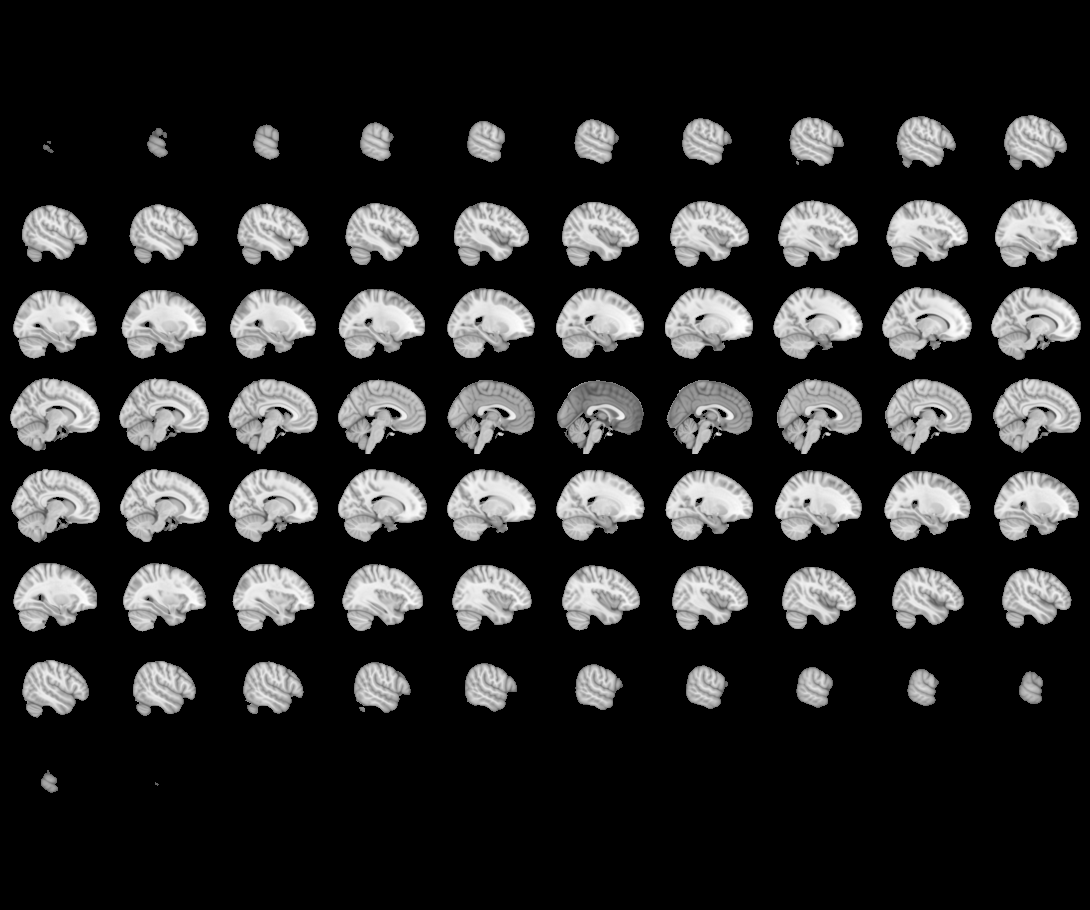
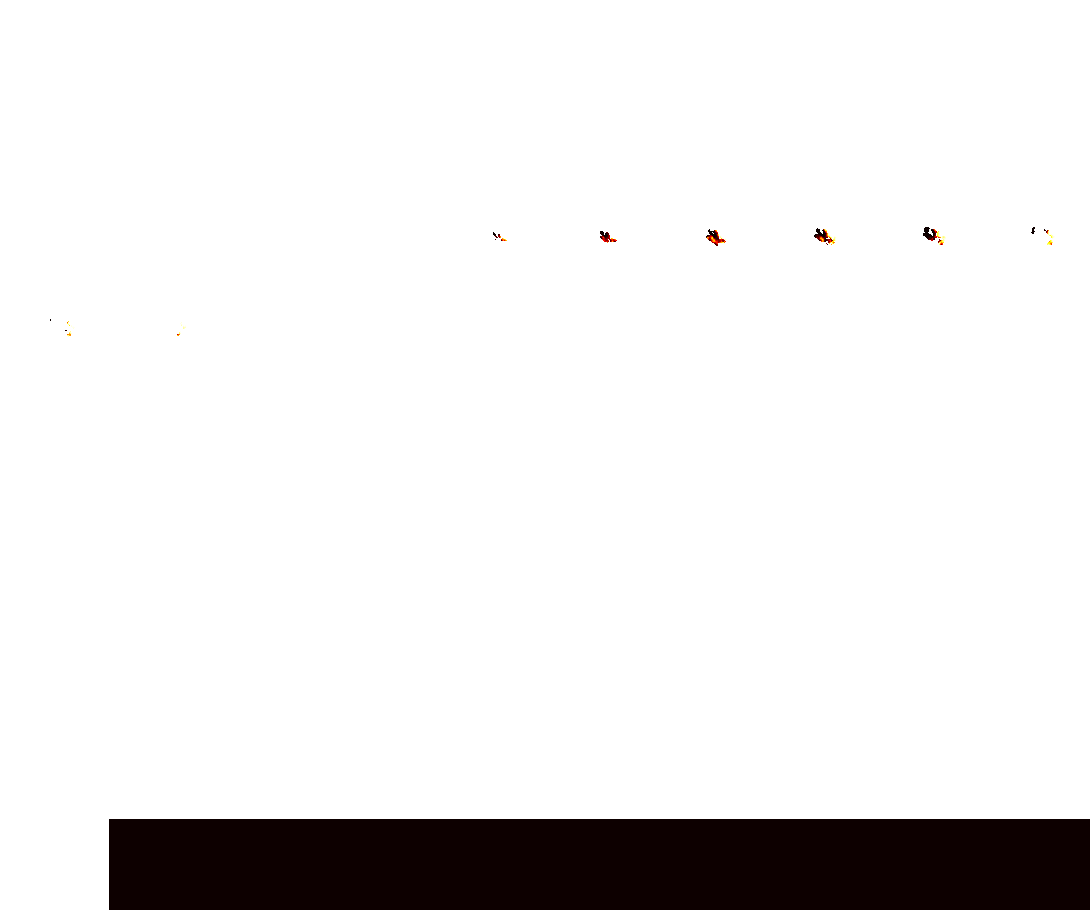

In [18]:
# P+ map
plotting.view_img(probMask,dim=0,vmax=1,draw_cross=False)

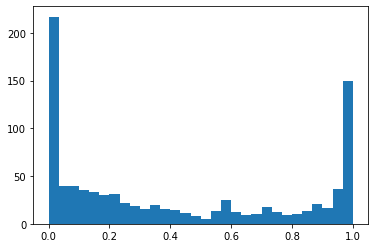

In [19]:
# Check the ditribution of the P+ values. They all should be between 0-1. If not, I did something wrong.
probs = probMask.get_data()[np.where(np.logical_and(probMask.get_data() > 0, probMask.get_data() <= 1))]
_=plt.hist(probs,bins = int(np.sqrt(len(probs))))

In [21]:
# Final P+ map
probMask.to_filename(respat+'_cond_Probmap.nii.gz')